# NFL Combine Classification Modeling

## Technical Notebook

## Project Goals

- Determine the influence the NFL Combine has on a lineman (offensive linemen and defensive linemen) prospect's draft status (getting drafted or not).
- Discover which NFL Combine drills have the most impact on a lineman (offensive linemen and defensive linemen) prospect's draft position.
- Reveal how much the NFL Combine factors in on a lineman (offensive linemen and defensive linemen) prospect's draft value (how early or how late a prospect gets drafted, if at all). **(*FUTURE WORK*)**

## Summary of Data

The dataset that was analyzed for this study contains 9,544 observations of NFL Combine and NFL Draft data, dating from 1987-2017. The NFL Combine data primarily displays the performance of players over that time period in combine drills. The NFL Draft data contains the draft pick information of players from that time span, including what round they were selected in and the team that picked them.

### Library Import

In [1]:
#Import libraries
%run ../python_files/libraries
%matplotlib inline
# from libraries import *   #for use within .py file

/Users/michaelpallante/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/michaelpallante/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/michaelpallante/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  dep

### Data Import

In [2]:
#Import cleaned data from our exploratory data analysis
%run ../python_files/nfl_combine_eda

## Modeling

##### Pre-Modeling Techniques

- Scaling: We use Standard Scaler to scale our 'x' training and test datasets so that our model does not unfairly penalize our coefficients due to differences in units.

- Resampling: We use SMOTE for resampling, as this method creates synthetic samples for minority classes. This will oversample the minority classes and thus, add more balance to our model.

##### Model Implementation and Model Performance

We utilized a pipeline technique to implement 8 different model types:

- Logistic Regression
- KNN
- SVC
- NuSVC
- Decision Tree
- Random Forest
- Ada Boost
- Gradient Boosting

After running our pipeline, we will be able to review model performance using precision as our primary metric, as well as accuracy and confusion matrices to review correct predictions vs incorrect predictions. We chose precision as our primary metric because in our case, false positives are worse than false negatives, as we don’t want to inform a player that they will get drafted and then they actually don’t.

In [3]:
# draft_status Training Model Selection and Comparison

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(),
    NuSVC(probability=True),
    DecisionTreeClassifier(max_depth = 8),
    RandomForestClassifier(max_depth = 8),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline([
                     ('ss', StandardScaler()),
                     ('classifier', classifier)])
    pipe.fit(x_train_ds, y_train_ds)   
    print(classifier, '\n')
    conf_matrix = pd.DataFrame(confusion_matrix(y_train_ds, pipe.predict(x_train_ds)),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
    display(conf_matrix)
    print("Precision Score: ",conf_matrix.iloc[1,1]/(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]))
    print("model score: %.3f" % pipe.score(x_train_ds, y_train_ds), '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



,predicted 0,predicted 1
actual 0,242,571
actual 1,143,1522


Precision Score:  0.7271858576206403
model score: 0.712 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform') 



,predicted 0,predicted 1
actual 0,492,321
actual 1,133,1532


Precision Score:  0.8267674042093902
model score: 0.817 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,242,571
actual 1,70,1595


Precision Score:  0.7363804247460757
model score: 0.741 

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,501,312
actual 1,73,1592


Precision Score:  0.8361344537815126
model score: 0.845 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 



,predicted 0,predicted 1
actual 0,461,352
actual 1,135,1530


Precision Score:  0.8129649309245484
model score: 0.803 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 



,predicted 0,predicted 1
actual 0,364,449
actual 1,18,1647


Precision Score:  0.7857824427480916
model score: 0.812 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 



,predicted 0,predicted 1
actual 0,271,542
actual 1,151,1514


Precision Score:  0.7363813229571985
model score: 0.720 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 



,predicted 0,predicted 1
actual 0,339,474
actual 1,78,1587


Precision Score:  0.7700145560407569
model score: 0.777 



In [4]:
# draft_status Test Model Selection and Comparison

for classifier in classifiers:
    pipe = Pipeline([
                     ('ss', StandardScaler()),
                     ('classifier', classifier)])
    pipe.fit(x_train_ds, y_train_ds)   
    print(classifier, '\n')
    conf_matrix = pd.DataFrame(confusion_matrix(y_test_ds, pipe.predict(x_test_ds)),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
    display(conf_matrix)
    print("Precision Score: ",conf_matrix.iloc[1,1]/(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]))
    print("model score: %.3f" % pipe.score(x_test_ds, y_test_ds), '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



,predicted 0,predicted 1
actual 0,53,151
actual 1,28,388


Precision Score:  0.7198515769944341
model score: 0.711 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform') 



,predicted 0,predicted 1
actual 0,75,129
actual 1,76,340


Precision Score:  0.7249466950959488
model score: 0.669 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,41,163
actual 1,24,392


Precision Score:  0.7063063063063063
model score: 0.698 

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,80,124
actual 1,65,351


Precision Score:  0.7389473684210527
model score: 0.695 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 



,predicted 0,predicted 1
actual 0,67,137
actual 1,72,344


Precision Score:  0.7151767151767152
model score: 0.663 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 



,predicted 0,predicted 1
actual 0,37,167
actual 1,22,394


Precision Score:  0.7023172905525846
model score: 0.695 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 



,predicted 0,predicted 1
actual 0,65,139
actual 1,44,372


Precision Score:  0.7279843444227005
model score: 0.705 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 



,predicted 0,predicted 1
actual 0,49,155
actual 1,41,375


Precision Score:  0.7075471698113207
model score: 0.684 



## Best Model

### Our *NuSVC Model* had the best model performance.

#### Further analysis of this model will help us determine how important the NFL Combine is for linemen (offensive and defensive linemen).

##### Model Implementation

In [5]:
# re-run our NuSVC model for further review of model performance

classifier_nusvc = [NuSVC(probability=True)]

for classifier in classifier_nusvc:
    pipe = Pipeline([
                     ('ss', StandardScaler()),
                     ('classifier', classifier)])
    pipe.fit(x_train_ds, y_train_ds)   
    print(classifier, '\n')
    conf_matrix = pd.DataFrame(confusion_matrix(y_test_ds, pipe.predict(x_test_ds)),
                           index = ['actual 0', 'actual 1'], 
                           columns = ['predicted 0', 'predicted 1'])
    display(conf_matrix)
    print("Precision Score: ",conf_matrix.iloc[1,1]/(conf_matrix.iloc[1,1]+conf_matrix.iloc[0,1]))
    print("model score: %.3f" % pipe.score(x_test_ds, y_test_ds), '\n')

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False) 



,predicted 0,predicted 1
actual 0,80,124
actual 1,65,351


Precision Score:  0.7389473684210527
model score: 0.695 



##### Accuracy Calculation

Through the above calculation of accuracy, approximately 70% of the variability in 'draft_status' can be explained using our feature variables, which is promising for our first run of this model.

##### Precision Calculation and Confusion Matrix Results

The calculation of approximately 74% precision is good for our purposes, as we indentified precision as our optimized metric for this study.

The above confusion matrix results are telling us that our of 620 total predictions, we have 431 correct predictions (351 true positives + 80 true negatives = 431 correct predictions) and 189 incorrect predictions (124 false positives + 65 false negatives = 189 incorrect predictions). The ratio of approximately 2.3 correct predictions to every 1 incorrect prediction is also a good sign for our first run of this model.

##### ROC Curve

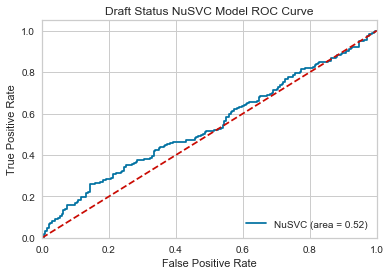

In [6]:
# ROC Curve of our NuSVC model for further review of model performance

nusvc_model = NuSVC(probability=True)
nusvc_model.fit(x_train_ds, y_train_ds)

nusvc_roc_auc = roc_auc_score(y_test_ds, nusvc_model.predict(x_test_ds))
fpr, tpr, thresholds = roc_curve(y_test_ds, nusvc_model.predict_proba(x_test_ds)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NuSVC (area = %0.2f)' % nusvc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Draft Status NuSVC Model ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Which combine drills are most important for linemen (offensive and defensive linemen)?

### We use our *Logistic Regression model* to answer this question.

#### Further analysis of this model will help determine which combine drills are most important for linemen (offensive and defensive linemen).

##### Model Implementation

Through the review of our logistic regression model results, we can use the coefficient values of our feature variables to identify which combine drills are of most importance for linemen.

In [7]:
logit_model = sm.Logit(y_train_ds, x_train_ds)
logit_result = logit_model.fit()
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.568057
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           draft_status   No. Observations:                 2478
Model:                          Logit   Df Residuals:                     2460
Method:                           MLE   Df Model:                           17
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.1023
Time:                        15:00:50   Log-Likelihood:                -1407.6
converged:                       True   LL-Null:                       -1568.1
Covariance Type:            nonrobust   LLR p-value:                 5.264e-58
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
height_inches                   0.1117      0.027      4.084      0.000   

##### Evaluation of Model Coefficients

After running our logistic regression model, we can see which feature variables have an impact on draft_status. It is clear that the 40_yard_dash is by far the most statistically significant, implying that this combine drill has the strongest influence on draft_status. The next most significant feature variables are 3_cone_drill and 3_cone_drill_missed.

## Conclusions and Recommendations

- The NFL Combine proves that strong athleticism can solely get a player drafted.
- From a team's perspective, excluding a player's college statistics, teams display a high willingness to take a chance on a player who performs well in the NFL Combine.
- From a player's perspective, if a player is lacking a strong volume of college statistics, the NFL Combine offers them a big opportunity to get drafted. The NFL Combine matters enough that if a player performs well in the event, it is likely to get that player drafted.
- From an agent or draft evaluator's perspective, precision is our preferred metric when offering a player a projection on his potential draft status. In our model, false positives are worse than false negatives, as we don’t want to inform a player that they will get drafted and then they actually don’t. We want to be conservative and very sure in our recommendations to players. We want to avoid offering incorrect projections as much as possible.
- The drill that has the most impact on a lineman's draft status is by far the 40-Yard Dash. The 40-Yard Dash shows strong predictive power in that a good performance in this drill can actually help boost a lineman's draft status, while a bad performance in this drill can actually hurt a player's draft status. The second most important drill is the 3-Cone Drill. Similarly to the 40-Yard Dash, a good performance in this drill can slightly improve a player's draft status, while a bad performance can slightly harm a player's draft_status. It is also notable that players who skipped the 3-Cone Drill entirely had a higher draft status. We suspect that this is the case because most of the time, the players who skip this drill are already highly likely to be drafted. 